# Worksheet 12: Binary or Discrete Counts Responses

#### Lecture and Tutorial Learning Goals:
After completing this week's lecture and tutorial work, you will be able to:

1. Describe the logistic regression estimation procedure (binary response variable), and Poisson regression estimation procedure (discrete counts as the response variable).
2. Discuss the relationship between linear regression and logistic and Poisson regression. Discuss the consequences of modeling data that is more suitable for logistic and Poisson regression models as a linear regression model.
3. Interpret the coefficients and $p$-values in the logistic and Poisson regression settings.
4. Write a computer script to perform logistic and Poisson regression and perform model diagnostics. Interpret and communicate the results from that computer script.

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(mlbench)
library(AER)
library(ISLR)
library(broom)
library(qqplotr)
library(performance)
library(see)
library(MASS)
library(glmbb)
library(cowplot)
source("tests_worksheet_12.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:



## 1. Intro

In previous week, you explored the Multiple Linear Regression (MLR) as a way to model the mean of a numeric response variable, $Y$, given a set of covariate $\mathbf{X}$:

$$
E\left[Y\left|\mathbf{X}=\left(X_1,...,X_p\right)\right.\right] = \beta_0 + \beta_1X_1 + \ldots + \beta_pX_p
$$

However, in some situations, the MLR is not suitable. This week we are going to study two of those situations that commonly arises in practice:

- **in this worksheet**: the case of dichotomous response variables (e.g., yes/no, success/failure, win/lose, sick/not sick)  
- **in the tutorial**: the case of response variables representing counts (e.g., number of cases of a rare disease in Vancouver in a period of one year; the number of accidents in the Canada Highway in a period of one month).

## 1. Logistic Regression

Logistic Regressions are commonly used to model the probability of an event against a set of observed covariates.

As learned for Linear Regression, Logistic Regression can be used 

- to <font color=blue> **estimate  and  test** </font> the true relation between different type of variables and a **binary response**


- to <font color=blue> **predict** </font> the *probability* of a **binary response** (aka, classifier)

**For example**: we can use a logistic regression to

- compare the presence of a bacteria between groups taking a new drug and a placebo, respectively.
    - **response**: `present` or `not present`

- predict whether or not a customer will default on a loan given their income and demographic variables.
    - **response**: `default` or `not default`

- know how GPA, ACT score, and number of AP classes taken is associated with the probability of getting accepted into a particular university.
    - **response**: `accepted` or `not accepted`

#### The response variable:

In many applications, the response variable will not be a numeric vector in the dataset. In those cases, we need to create a new numerical response variable to fit a logistic model.
> the function in R to fit a logistic regression requires a numerical response and won't create it for us!

Mathematically, we have to construct a binary response $Y_i$ that represents the "proportion" of sucess (S) for a given event of interest: 

$$
Y_i =
\begin{cases}
1 \; \; \; \; \mbox{if the $i$th observation is S},\\
0 \; \; \; \; 	\mbox{otherwise.}
\end{cases}
$$

In the examples above, we would set:

- $Y_i = 1$ if the bacteria is present in the blood sample of the $i$th patient 


- $Y_i = 1$ if the $i$th customer defaulted on their loan


- $Y_i = 1$ if the $i$th student was accepted to a particular university


In statistics, we refer to each of cases as a **Bernoulli** trial with a $p_i$ probability of success, i.e., 

$$Y_i \sim \text{Bernoulli}(p_i)$$

where 

$$
E(Y_i) = p_i
$$

In this worksheet will focus on the dataset `Default` from [*An Introduction to Statistical Learning*](https://www.statlearning.com/) (James et al., 2013). This is a dataset of $n = 10,000$ observations with the following variables:

- `default`: a binary response indicating whether the customer defaulted on their debt (`Yes` or `No`).
- `student`: a binary input variable indicating whether the customer is a student (`Yes` or `No`).
- `balance`: a continuous input variable indicating the remaining average balance of the customer's credit card (after the monthly payment).
- `income`: a continuous input variable indicating the customer's income.

In [2]:
head(Default)

default student balance   income   
1 No      No       729.5265 44361.625
2 No      Yes      817.1804 12106.135
3 No      No      1073.5492 31767.139
4 No      No       529.2506 35704.494
5 No      No       785.6559 38463.496
6 No      Yes      919.5885  7491.559

**Question 1.0**
<br>{points: 1}

We want to assess whether the response `default` is statistically associated to the input variables `student`, `balance`, and `income`. 

We need to construct a response $Y_i$ such that  $Y_i = 1$ if the $i$th customer is in default, and $0$ otherwise.

In the  `default` column, replace the levels `Yes` and `No` with the numerical values `1` and `0`, respectively.

**Note**: the response $y$ is an interger, *not* a factor, since we need R to interpret them as sample proportions.

In [3]:
# default.df <- 
#     Default %>% 
#     ...(... = ...(..., 1, 0))

#head(default.df)

# your code here
default.df <- 
    Default %>% 
    mutate(default = if_else(default == "Yes", 1, 0))

head(default.df)


head(default.df)

default student balance   income   
1 0       No       729.5265 44361.625
2 0       Yes      817.1804 12106.135
3 0       No      1073.5492 31767.139
4 0       No       529.2506 35704.494
5 0       No       785.6559 38463.496
6 0       Yes      919.5885  7491.559

default student balance   income   
1 0       No       729.5265 44361.625
2 0       Yes      817.1804 12106.135
3 0       No      1073.5492 31767.139
4 0       No       529.2506 35704.494
5 0       No       785.6559 38463.496
6 0       Yes      919.5885  7491.559

In [4]:
test_1.0()

Test passed 🎊
Test passed 🥇
Test passed 😀
Test passed 😸
Test passed 😸
[1] "Success!"


#### The conditional expectation 

We have seen before that a MLR

In this first exercise, we use a simple linear regression (SLR), as we have done before, to estimate the relation between `balance` and the response `default`.

As we previously recalled, a SLR will model: 

$$
E\left[Y_\texttt{default}|X_\texttt{balance}\right] = \beta_0 + \beta_1 X_\texttt{balance}
$$

However, since `default` is a binary variable we also know that its expectation equals the probability of default:

$$
E\left[Y_\texttt{default}|X_\texttt{balance}\right] = p_{\texttt{default}}
$$

> for simplicity, the subscript $i$ is omitted

Let's examine if there is a problem using a linear regression to model this conditional expectation. 

**Question 1.1**
<br>{points: 1}

Create a plot of the data (using `geom_point()`) along with the estimated regression line (using `geom_smooth()` with `method = "lm"`). Include proper axis labels. The `ggplot()` object's name will be `Default_SLR_plot`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

`geom_smooth()` using formula = 'y ~ x'


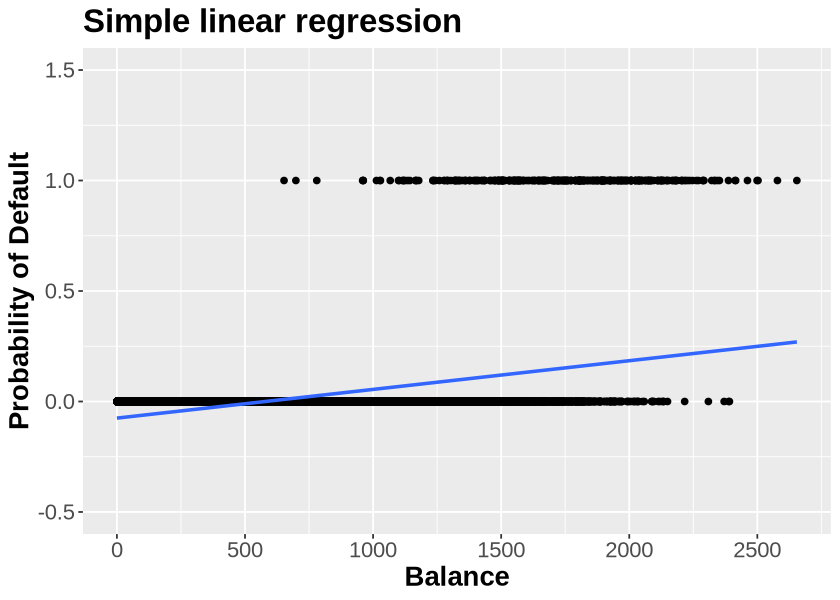

In [5]:
options(repr.plot.width = 7, repr.plot.height = 5) # Adjust these numbers so the plot looks good in your desktop.

# Default_SLR_plot <- ...(...) +
#   ...(aes(..., ...)) +
#   ...(aes(..., ...), method = ..., se = FALSE) +
#   labs(y = ..., x = ...) +
#   ggtitle(...) +
#   ylim(-0.5, 1.5) +
#   theme(
#     text = element_text(size = 16.5),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold"),
#     legend.title = element_text(face = "bold")) +
#   scale_x_continuous(breaks = seq(0, 2500, 500))


# your code here
Default_SLR_plot <- ggplot(default.df) +
  geom_point(aes(balance, default)) +
  geom_smooth(aes(balance, default), method = "lm", se = FALSE) +
  labs(y = "Probability of Default", x = "Balance") +
  ggtitle("Simple linear regression") +
  ylim(-0.5, 1.5) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold")) +
  scale_x_continuous(breaks = seq(0, 2500, 500))

Default_SLR_plot

In [6]:
test_1.1()

Test passed 🎉
Test passed 🌈
Test passed 🎉
Test passed 🥇
Test passed 🎉
Test passed 🥳
Test passed 🥇
[1] "Success!"


**Class Discussion:** 

Do you see any problems with our model?  

#### Logistic Regression: an alternative to LR

The problem stems from using the *linear* model to estimate a probability! 

Mathematically, the linear component $\boldsymbol{X_i}^\top\boldsymbol{\beta}$ can take any value in $\mathbb{R}$ while $p_i$ has to be in [0, 1].

A natural way to solve this problem is to use a curve, instead of a line, with a range between $[0,1]$. One of such curves is the logistic curve:

$$E(Y_i|X_{\textit{i,balance}}) = p_i = \frac{e^{\beta_0 + \beta_1X_{\textit{i,balance}}}}{1+e^{\beta_0 + \beta_1X_{\textit{i,balance}}}}$$ 

**Note** that we are still using a linear component but not to directly model the conditional expectation. With some algebra, we can show that:

\begin{equation*}
\log\left(\frac{p_i}{1 - p_i}\right) = \beta_0 + \beta_1 X_{i,\texttt{balance}}.
\end{equation*}

**Definition**: $p_i$ to $1 - p_i$ are also known as the **odds** and can be estimated by *number of sucesses* to *number of failures*

For example, among 7056 non-student customers, 206 defaulted on their debt. Thus, the odds that non-student customers default is 206 to 7056. 

The function $\log\left(\frac{p_i}{1 - p_i}\right)$ is called `logit`, and it is *logarithm of the odds*. 

Let's explore a bit this new function.

**Question 1.2**
<br>{points: 1}

Let's see how the logistic curve looks like. In this exercise, you are going to plot the logistic curve to see how it behaves.

_Save the plot in an object named `logistic_curve`._

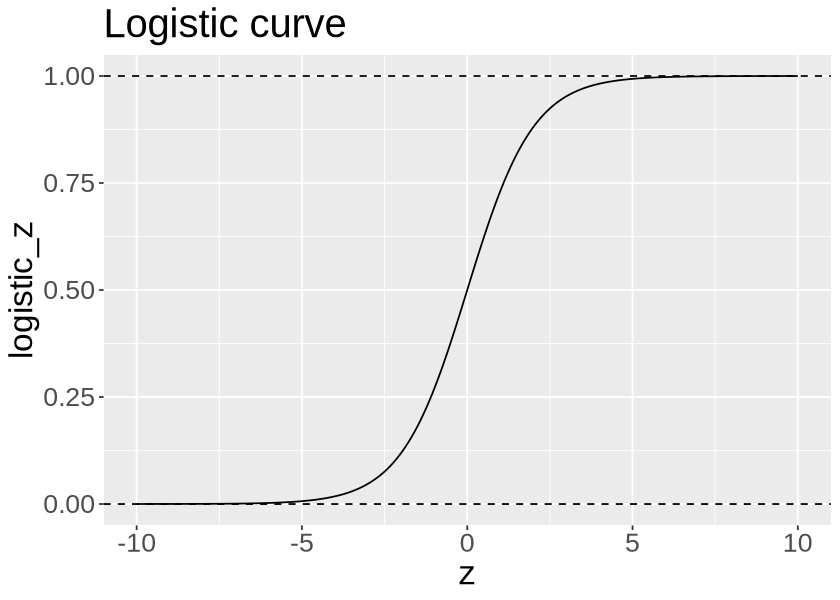

In [7]:
# logistic_curve <-
#     tibble(z = seq(-10,10,0.01),
#            logistic_z = ...) %>% 
#     ggplot(aes(z, ...)) + 
#     geom_line() +
#     geom_hline(yintercept = 1, lty=2) + 
#     geom_hline(yintercept = 0, lty=2) +
#     theme(text = element_text(size = 20)) + 
#     ggtitle("Logistic curve")

# your code here
logistic_curve <-
    tibble(z = seq(-10,10,0.01),
           logistic_z = exp(z)/(1+exp(z))) %>% 
    ggplot(aes(z, logistic_z)) + 
    geom_line() +
    geom_hline(yintercept = 1, lty=2) + 
    geom_hline(yintercept = 0, lty=2) +
    theme(text = element_text(size = 20)) + 
    ggtitle("Logistic curve")
           
logistic_curve

In [8]:
test_1.2()

Test passed 🎉
Test passed 🥇
Test passed 🌈
Test passed 😀
Test passed 🎉
Test passed 🥳
[1] "Success!"


**Question 1.3: Understanding the odds**
<br>{points: 1}

Vancouver Canucks is playing against Calgary Flames in the Final of NHL. The match will be at Rogers' arena, Canucks home. It is expected that out of 18,910 seats in the arena, 13700 seats will be occupied by Canucks fans. During the match, prizes are randomly distributed among the seats. What are the odds that a Canucks fan wins a given prize? 

Assign your answer to an object named `answer1.3`.

In [9]:
#answer1.3 <- ...

# your code here
answer1.3 <- 13700/(18910 - 13700)

answer1.3

[1] 2.629559

In [10]:
test_1.3()

Test passed 😀
Test passed 🎉
Test passed 🎉
[1] "Success!"


**Question 1.4:**
<br>{points: 1}

Let us plot the predictions of the binary logistic regression model on top of `Default_SLR_plot`. Use `geom_smooth()` with `method = "glm"` and `method.args = c(family = binomial)`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


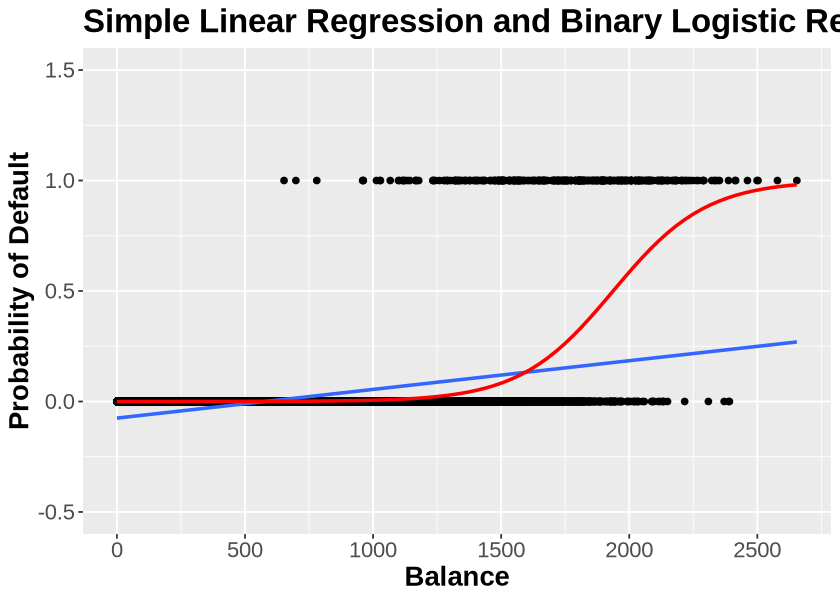

In [11]:
# Default_SLR_plot <- 
#     Default_SLR_plot +
#     ...(aes(..., ...),
#         method = ...,
#         method.args = ..., 
#         se = FALSE, color = "red") +
#     ylim(-0.5,1.5)  +
#     ggtitle("Simple Linear Regression and Binary Logistic Regression")

# your code here
Default_SLR_plot <- 
    Default_SLR_plot +
    geom_smooth(aes(balance, default),
        method = "glm",
        method.args = c(family = binomial), 
        se = FALSE, color = "red") +
    ylim(-0.5,1.5)  +
    ggtitle("Simple Linear Regression and Binary Logistic Regression")


Default_SLR_plot

In [12]:
test_1.4()

Test passed 🥇
Test passed 🎊
Test passed 🥇
Test passed 🎊
Test passed 🥳
Test passed 😸
Test passed 🌈
[1] "Success!"


Much better, isn't it? 

#### The model

Let's review our model!

The response: 

$$
Y_i =
\begin{cases}
1 \; \; \; \; \mbox{if the $i$th observation is a success},\\
0 \; \; \; \; 	\mbox{otherwise}
\end{cases}
$$

can only take the values $0$ or $1$. 

The conditional expected value of this variable is the probability that $Y_i$ takes on the value of $1$, or probability of success, denoted as $p_i$. Hence:

$$\left.Y_i\right|\mathbf{X}_{i} \sim \text{Bernoulli}(p_i).$$

The <font color = "blue"> **logistic regression** </font> models the probability $p_i$ given the information of a set of covariates but *not* directly as a linear function of them. Instead, it re-expresses $p_i$ on an unrestricted scale, called the <font color = "blue"> **log-odds** </font>:

$$
\mbox{logit}(p_i) = \log \bigg( \frac{p_i}{1 - p_i}\bigg) = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \ldots + \beta_{q} X_{iq},
$$

> the logarithm of the odds is the logarithm of the ratio of the probability of a sucess to the probability of a failure of an event

Or equivalently

$$
p_i = \frac{\exp\big[\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \ldots + \beta_{q} X_{iq}\big]}{1 + \exp\big[\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \ldots + \beta_{q} X_{iq}\big]}.
$$

**In our example**

$$
\mbox{logit}(p_{i,\texttt{default}}) = \log \bigg( \frac{p_{i,\texttt{default}}}{1 - p_{i,\texttt{default}}}\bigg) = \beta_0 + \beta_1 X_{i,\texttt{balance}}
$$

or equivalently

$$
p_{i,\texttt{default}} = \frac{e^{\beta_0 + \beta_1 X_{i,\texttt{balance}}}}{1 + e^{\beta_0 + \beta_1 X_{i,\texttt{balance}}}}.
$$

In this example, the *odds* are interpreted as how likely the $i$th customer is to be in default compared to how unlikely it is, at a fixed value of their balance. 

### 1.1 Estimation

The question now is, how do we estimate the coefficients $\beta_j$'s? 

So far, in the case of linear regression, we have been using the Least Square Estimators. However, due to type of response of the logistic model this objective function is no longer appropriate.

A common method to estimate a logistic regression (and many other models) is a method called **Maximum Likelihood Estimation**. Details of MLE are outside the scope of this course but we will still implement it using R! 


**Interpretation**

As before, the interpretation of the coefficients will depend on the type of input variable. 

Let's start by looking at a model with only 1 categorical covariate. For example, being or not being a student.

We know that in this case, `R` will create a dummy variable $X$ to include in the model. But how do we interpret its coefficient??

> for LR, the intercept was the mean of the response of the reference group (and the *estimate* was the *sample* mean)

> for LR, the "slope" was the *difference* between the mean of the response of the treatment group vs that of the reference group (and the *estimate* was the difference of *sample* means)

But for LR, we modeled directly the expected value of the response. We now need to adjust the interpretations to changes in *log-odds*!!

- Intercept: $\hat{\beta}_0$ represents the log-odds of the reference group (e.g., non-students)

- Slope: $\hat{\beta}_1$ represents the difference in log-odds between the treatment and the reference group (e.g., students vs. non-students)

Since log-odds are difficult to interpret, it is common to also interpret the exponentiated version of the coefficients:

- Intercept: $e^{\hat{\beta}_0}$ represents the odds of the reference group, i.e., proportion of success relative to proportion of failures in the sample 

- Slope: $e^{\hat{\beta}_1}$ represents the *odds ratio*, i.e., ratio between the odds of the treatment vs the odds of the reference group

*Run the cell below to compute these quantities. Read and follow calculations*

In [13]:
default.df %>% dplyr::select(default, student) %>% 
    group_by(default, student)%>%
    summarise(n=n(), .groups = 'drop')

default student n   
1 0       No      6850
2 0       Yes     2817
3 1       No       206
4 1       Yes      127

In [14]:
# b0 = \hat{beta}_0
tot_studentNo <- 6850 + 206
# probability of default if non-student
# note that the same is true for #default1_studentNo/#default0_studentNo
p_studentNo <- 206/tot_studentNo
b0 <- log(p_studentNo/(1-p_studentNo))

# b1 = \hat{beta}_1
tot_studentYes <- 2817 + 127
# probability of default if student
p_studentYes <- 127/tot_studentYes
# log odds of students vs. log odds of non-students
b1 <- log(p_studentYes/(1-p_studentYes)) - b0

print("log-odds for non-students (b0) and for students")
c(b0,log(p_studentYes/(1-p_studentYes))) %>% round(3)


print("odds for non-students (exp(b0)) and for students")
c(exp(b0),(p_studentYes/(1-p_studentYes))) %>% round(3)


print("odds ratio (exp(b1))")
c(exp(b1), 
  (p_studentYes/(1-p_studentYes))/(p_studentNo/(1-p_studentNo)))  %>% 
  round(3)

[1] "log-odds for non-students (b0) and for students"


[1] -3.504 -3.099

[1] "odds for non-students (exp(b0)) and for students"


[1] 0.030 0.045

[1] "odds ratio (exp(b1))"


[1] 1.499 1.499

**Question 1.5:**
<br>{points: 1}

In order to fit the model, we can use the function `glm()` and its argument `family = binomial` (required to specify the binary nature of the response). 

Let us use the function `glm()` to estimate a binary logistic regression. Using `default.df`, we will fit a binary logistic model with `default` as the response and `student` as input variable.
    
Store the model in an object named `Default_binary_log_student`. The `glm()` parameters are analogous to `lm()` (`formula` and `data`) with the addition of `family = binomial` for this specific model. 

In [15]:
# Default_binary_log_student <- 
#   ...(
#        formula = ...,
#        data = ...,
#        family = ...)


# your code here
Default_binary_log_student <- 
  glm(
       formula = default ~ student,
       data = default.df,
       family = binomial)

summary(Default_binary_log_student)


Call:
glm(formula = default ~ student, family = binomial, data = default.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2970  -0.2970  -0.2434  -0.2434   2.6585  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50413    0.07071  -49.55  < 2e-16 ***
studentYes   0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


In [16]:
test_1.5()

Test passed 😸
Test passed 🌈
Test passed 🥇
[1] "Success!"


Note that you can also use the function `tidy()` to obtain a summary table of results.

In [17]:
#Run this cell to get a tidy summary table

Default_binary_log_student_results  <-
    tidy(Default_binary_log_student) %>% 
    mutate(exp.estimate = exp(estimate)) %>% 
    mutate_if(is.numeric, round, 3)

Default_binary_log_student_results 

term        estimate std.error statistic p.value exp.estimate
1 (Intercept) -3.504   0.071     -49.554   0       0.030       
2 studentYes   0.405   0.115       3.520   0       1.499

**Note**: you can also get the exponentiated coefficients with the argument `exponentiate = TRUE` in `tidy()`. Note that the SEs are adjusted as well so this would be a better approach!

In [18]:
tidy(Default_binary_log_student, exponentiate = TRUE)%>% 
    mutate_if(is.numeric, round, 3)

term        estimate std.error statistic p.value
1 (Intercept) 0.030    0.071     -49.554   0      
2 studentYes  1.499    0.115       3.520   0

**Question 1.6**
<br>{points: 1}

Considering the `Default_binary_log_student_results` tibble, what is the correct interpretation of the  $\hat{\beta}_\textit{student}$?

**A.** The odds of default are $49.9\%$ higher for non-student custormers compared to student customers.

**B.** The odds of default are $49.9\%$ higher for student custormers compared to non-student customers.

**C.** The odds of default are $40.5\%$ higher for non-student custormers compared to student customers.

**D.** The odds of default are $40.5\%$ higher for student custormers compared to non-student customers.

*Assign your answer to the object `answer1.6` (character type surrounded by quotes).*

In [19]:
# answer1.6 <- ...

# your code here
answer1.6 <- "B"

In [20]:
test_1.6()

Test passed 🥳
Test passed 🥇
Test passed 😸
[1] "Success!"


#### Multiple covariates

And the interpretation extends to the case of more covariates of different types

- $\hat{\beta}_1$ gives the changes in log odds per one-unit increase in X, 
    - or equivalently it multiplies the odds by $e^{\hat{\beta}_1}$
    
> **Note**: because the relationship between $p_i$ and $X_i$ is not a straight line, $\hat{\beta}_1$ does not correspond to the change in $p_i$ associated with a one-unit change in $X_i$. But regardless,
if $\hat{\beta}_1$ is positive then increasing $X_i$ will be associated with increasing $p_i$ and visceversa.

> **Note**: when the odds decreases, i.e., negative change in log-odds, it is easier to interpret $1/e^{\hat{\beta}_1}$. That is, to redefine odds= #failures/#successes

**Question 1.7:**
<br>{points: 1}

In order to fit the model, we can use the function `glm()` and its argument `family = binomial` (required to specify the binary nature of the response). 

Let us use the function `glm()` to estimate a binary logistic regression. Using `default.df`, we will fit a binary logistic model with `default` as the response and `student`, `balance`, and `income` as input variables.
    
Store the model in an object named `Default_binary_log_model`. The `glm()` parameters are analogous to `lm()` (`formula` and `data`) with the addition of `family = binomial` for this specific model. 

In [21]:
# Default_binary_log_model <- 
#   ...(
#        ...,
#        ...,
#        ...)

#tidy(Default_binary_log_model) %>% 
#         mutate_if(is.numeric, round, 3)
#tidy(Default_binary_log_model, exponentiate = TRUE) %>% 
#         mutate_if(is.numeric, round, 3)

# your code here
Default_binary_log_model <- 
  glm(
       default ~ student + balance + income,
       data = default.df,
       family = binomial)

tidy(Default_binary_log_model) %>% 
    mutate_if(is.numeric, round, 3)
tidy(Default_binary_log_model, exponentiate = TRUE) %>% 
    mutate_if(is.numeric, round, 3)

term        estimate std.error statistic p.value
1 (Intercept) -10.869  0.492     -22.080   0.000  
2 studentYes   -0.647  0.236      -2.738   0.006  
3 balance       0.006  0.000      24.738   0.000  
4 income        0.000  0.000       0.370   0.712

term        estimate std.error statistic p.value
1 (Intercept) 0.000    0.492     -22.080   0.000  
2 studentYes  0.524    0.236      -2.738   0.006  
3 balance     1.006    0.000      24.738   0.000  
4 income      1.000    0.000       0.370   0.712

In [22]:
test_1.7()

Test passed 🥇
Test passed 🥳
Test passed 🥇
[1] "Success!"


**Question 1.8**
<br>{points: 1}

Considering the `Default_binary_log_model_results` tibble, what is the correct interpretation of the  $\hat{\beta}_\textit{student}$?

**A.** Since, $1 / 0.524 = 1.908$, we estimate that the odds of non-default are $90.8\%$ higher for non-student custormers compared to student customers, while keeping the rest of the input variables constant.

**B.** Since, $1 / 0.524 = 1.908$, we estimate that the odds of default are $90.8\%$ higher for non-student custormers compared to student customers, while keeping the rest of the input variables constant.

**C.** Since, $1 / 0.524 = 1.908$, we estimate that the odds of non-default are $90.8\%$ higher for student custormers compared to non-student customers, while keeping the rest of the input variables constant.

**D.** Since, $1 / 0.524 = 1.908$, we estimate that the odds of default are $90.8\%$ higher for student custormers compared to non-student customers, while keeping the rest of the input variables constant.

*Assign your answer to the object `answer1.8` (character type surrounded by quotes).*

In [23]:
# answer1.8 <- ...

# your code here
answer1.8 <- "C"

In [24]:
test_1.8()

Test passed 🥳
Test passed 😀
Test passed 🥇
[1] "Success!"


**Question 1.9**
<br>{points: 1}

What is the correct interpretation of the regression equation's estimated slope for `balance`?

**A.** A $\$1$ increase in `balance`, is associated with a $0.6\%$ increase in the odds of a customer to be in default, while keeping the rest of the input variables constant. 

**B.** A $\$1$ increase in `balance`, is associated with a $0.6\%$ increase in the odds of a customer to not be in default, while keeping the rest of the input variables constant.  

**C.** A $\$1$ increase in `balance`, is associated with a $0.6\%$ increase in the odds of a student customer to be in default, while keeping the rest of the input variables constant.  

**D.** A $\$1$ increase in `balance`, is associated with a $0.6\%$ increase in the odds of a non-student customer to be in default, while keeping the rest of the input variables constant.

*Assign your answer to the object `answer1.9` (character type surrounded by quotes).*

In [25]:
# answer1.9 <- ...

# your code here
answer1.9 <- "A"


In [26]:
test_1.9()

Test passed 🥇
Test passed 🎉
Test passed 🥳
[1] "Success!"


### 1.2 Inference

We can use this estimated model to make inference about the population parameters, i.e., we can determine whether an input variable is statistically associated with the logarithm of the odds through hypothesis testing for the parameters $\beta_j$. 

To do that, we need additional information about the estimators of the  regression coefficients, $\hat{\beta}_j$. In particular, we need their sampling distribution and corresponding standard errors, $\mbox{SE}\left(\hat{\beta}_j\right)$. 

**Theoretical test**:

To test the hypotheses
\begin{gather*}
H_0: \beta_j = 0\\
H_a: \beta_j \neq 0.
\end{gather*}

you can use the Wald statistic $z_j$

$$z_j = \frac{\hat{\beta}_j}{\mbox{SE}\left(\hat{\beta}_j\right)}$$

which under $H_0$ has an approximately standard normal distribution provided the sample size $n$ is large enough.

> this statistic is analogous to the $t$-value used in LR. 

Furthermore, given a specified level of confidence, we can construct approximate $(1 - \alpha) \times 100\%$ confidence intervals for the corresponding true value of $\beta_j$:

$$\hat{\beta}_j \pm z_{\alpha/2}\mbox{SE}\left(\hat{\beta}_j\right),$$

where $z_{\alpha/2}$ is the upper $\alpha/2$ quantile of the standard normal distribution.

**Question 1.10: Inference**
<br>{points: 1}

Report the estimated coefficients, their standard errors, and corresponding $p$-values by calling `tidy()` on `Default_binary_log_model`. Include the corresponding asymptotic 95% confidence intervals. 

_Store the results in the variable `Default_binary_log_model_results`._

In [27]:
# Default_binary_log_model_results <- 
#   ...(..., conf.int = TRUE) 

# your code here
Default_binary_log_model_results <- 
  tidy(Default_binary_log_model, conf.int = TRUE) 

Default_binary_log_model_results

term        estimate      std.error    statistic  p.value       conf.low     
1 (Intercept) -1.086905e+01 4.922555e-01 -22.080088 4.911280e-108 -1.185902e+01
2 studentYes  -6.467758e-01 2.362525e-01  -2.737646  6.188063e-03 -1.109018e+00
3 balance      5.736505e-03 2.318945e-04  24.737563 4.219578e-135  5.294898e-03
4 income       3.033450e-06 8.202615e-06   0.369815  7.115203e-01 -1.304712e-05
  conf.high    
1 -9.928174e+00
2 -1.822147e-01
3  6.204587e-03
4  1.912447e-05

In [28]:
test_1.10()

Test passed 🎉
Test passed 🥳
Test passed 🎊
Test passed 😀
Test passed 🎉
[1] "Success!"


**Question 1.11: Inference**
<br>{points: 1}

Use `tidy()` to  the estimated effect each of the variables has on the **odds** to the `Default_binary_log_model_results` tibble. Make sure to also include the confidence interval for these effects.

In [29]:
# Default_binary_odds_model_results <- 
#   ... %>%
#   mutate_if(is.numeric, round, 6)

# your code here
Default_binary_odds_model_results <- 
  tidy(Default_binary_log_model, conf.int = TRUE, exponentiate = TRUE) %>%
  mutate_if(is.numeric, round, 6)

Default_binary_odds_model_results

term        estimate std.error statistic  p.value  conf.low conf.high
1 (Intercept) 0.000019 0.492256  -22.080088 0.000000 0.000007 0.000049 
2 studentYes  0.523732 0.236253   -2.737646 0.006188 0.329883 0.833422 
3 balance     1.005753 0.000232   24.737563 0.000000 1.005309 1.006224 
4 income      1.000003 0.000008    0.369815 0.711520 0.999987 1.000019

In [30]:
test_1.11()

Test passed 🎊
Test passed 🥇
Test passed 🥇
Test passed 🎉
Test passed 🥇
[1] "Success!"


**Question 1.12**
<br>{points: 1}

Using a **significance level $\alpha = 0.05$**, which inputs are statistically associated to the probability of default in `Default_binary_log_model_results`?

**A.** The categorical input `student`.

**B.** The continuous input `balance`.

**C.** The continuous input `income`.

*Assign your answers to the object `answer1.12`. Your answers have to be included in a single string indicating the correct options **in alphabetical order** and surrounded by quotes (e.g., `"ABC"` indicates you are selecting the three options).*

In [31]:
# answer1.12 <- 

# your code here
answer1.12 <- "AB"

In [32]:
test_1.12()

Test passed 🌈
Test passed 🌈
[1] "Success!"


### 1.3 Prediction

Besides inference, we can use an estimated logistic regression model to predict the probability of success. 

\begin{gather*} 
\log \bigg( \frac{\hat{p}_i}{1 - \hat{p}_i}\bigg) = \hat{\beta}_0 +\hat{\beta}_1 x_{i1} + \ldots + \hat{\beta}_p x_{iq} \\
\end{gather*}

where lower letters $x$ were used to denote a particular observed value for the $i$th experimental unit.

**For example:**

Suppose we want to predict the odds of a student who has a credit card balance of \\$2200 and an income of \\$35000 to be in default relative to not being in default.

Mathematically (omitting $i$th for simplicity), our predicted log odds will be 

\begin{gather*} 
\log \bigg( \frac{\hat{p}_\texttt{default}}{1 - \hat{p}_\texttt{default}}\bigg) = \underbrace{-10.869045}_{\hat{\beta}_0} - \underbrace{0.646776}_{\hat{\beta}_1} \times (1) + \underbrace{0.005737}_{\hat{\beta}_2} \times (2200) + \underbrace{0.000003}_{\hat{\beta}_2} \times (35000)= 1.21 \\
\end{gather*}

Next, by taking the exponential on both sides of the equation, we obtain our predicted *odds*: 

$$
\frac{\hat{p}_\texttt{default}}{1 - \hat{p}_\texttt{default}} = e^{1.21} = 3.36.
$$

Finally, solving the above for $\hat{p}_\texttt{default}$, we obtain our predicted probability of default

$$
\hat{p}_\texttt{default} = 3.36/4.36 = 0.7706
$$

**Question 1.13**
<br>{points: 1}

Using `predict` and `Default_binary_log_model`, obtain the odds prediction above.

> **Hint:** Check the argument `type` when coding this prediction.

*Assign your answer to the object `answer1.13`. Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [33]:
# answer1.13 <- exp(...(...,
#   tibble(..., ..., ...),
#   type = ...))

# your code here
answer1.13 <- exp(predict(Default_binary_log_model,
  tibble(student = "Yes", balance = 2200, income = 35000),
  type = "link"))

answer1.13

1 
3.355703

In [34]:
test_1.13()

Test passed 😀
Test passed 🎊
Test passed 😀
[1] "Success!"


**Question 1.14**
<br>{points: 1}

We can also predict probabilities for classification purposes, i.e., whether the customer will default or not. Using the function `predict()` with the object `Default_binary_log_model`, obtain the estimated probability for a customer being in default. This customer is a `student` who has a credit card `balance` of `2200` with an income of `35000`.

> **Hint:** Check the argument `type` when coding this prediction.

*Assign your answer to the object `answer1.14`. Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [35]:
# answer1.14 <- 
#   ...(...,
#     tibble(..., ..., ...),
#     type = ...)

# your code here
answer1.14 <- 
  predict(Default_binary_log_model,
    tibble(student = "Yes", balance = 2200, income = 35000),
    type = "response")


answer1.14

1 
0.7704159

In [36]:
test_1.14()

Test passed 🥳
Test passed 🎉
Test passed 🌈
[1] "Success!"


**Overdispersion**

The variance of a binary response variable is a function of the mean: $p(1-p)$. What this means is that, the estimate of the mean also provides an estimate of the variance of the response. 

Since the logistic regression is built assuming that the response is *Bernoulli*, the estimated $\hat{p}$ conditions the estimated variance of the response to be $\hat{p}(1-\hat{p})$.  

Unfortunately, in real applications, even in situation where the model seems to be estimating the mean well, the variability of the data is not quite compatible with the model's assumed variance.

> this misspecification in the variance affects the SE of the coefficients, not their estimates.

A way around this problem is to estimate a dispersion parameter, usually called $\phi$, to correct the standard error of our estimators. An easy implementation is to change the `family` argument to a `quasibinomial`. Let's see an example.  

In [37]:
summary(glm(
    formula = default ~ student + balance + income,
    data = Default,
    family = quasibinomial))


Call:
glm(formula = default ~ student + balance + income, family = quasibinomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.087e+01  4.121e-01 -26.376  < 2e-16 ***
studentYes  -6.468e-01  1.978e-01  -3.270  0.00108 ** 
balance      5.737e-03  1.941e-04  29.551  < 2e-16 ***
income       3.033e-06  6.867e-06   0.442  0.65867    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.7007742)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 8


**Note** that the estimates haven't changed but the SE were adjusted to account for some overdispersion in the data.

### 1.4 Conclusions

- The (conditional) expectation of a binary response is the probability of success.

- A LR can not be used to model the conditional expectation of a binary response since its range extends beyond the interval $[0,1]$

- Instead, one can model a function of the conditional probability. A common choice in logistic regression is to use the *logit* function (logarithm of odds)

- The interpretation of the coefficients depends on the type of variables and the form of the model:

The raw coefficients are interpreted as:

- log-odds of a reference group
- difference of log-odds of a treatment vs a control group
- changes in log-odds per unit change in the input
    
The exponentiated coefficients are interpreted as:
- odds of a reference group
- odds ratio of a treatment vs a control group
- multiplicative changes in odds per unit change in the input
    
- The estimated logistic model can be used to make inference using the Wald's test

- The estimated logistic model can be used to make predictions
    - the probability of success
    - the odds of success relative to failure